<a href="https://colab.research.google.com/github/aiaaee/Analyse_Simple_Image/blob/main/Image_Analyzing3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filters for edge detection in image processing
In image processing, gradient-based filters are one of the important tools that are used to extract image features by means of gradients - that is, brightness intensity differences. So far, we have fully learned how to calculate gradients in images. In the following, we examine some conventional edge detection filters, `Roberts` , `Prewitt` and `Sobel`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage, datasets

In [8]:
Picture = cv2.imread('/content/4906111713.tif', 0)
img = Picture

##  Roberts Edge Detection

The Roberts operator measures a 2-D spatial gradient on an image in a straightforward, quick-to-compute manner. As a result, strong spatial gradient zones, which frequently correspond to edges, are highlighted. The operator’s input and output are both grayscale images in their most typical configuration. The estimated absolute magnitude of the input image’s spatial gradient at that position is represented by pixel values at each place in the output.  

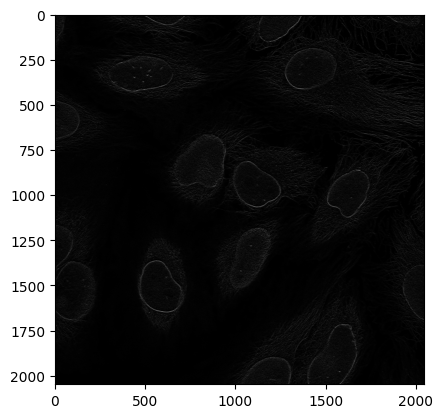

In [9]:


roberts_cross_v = np.array([[1, 0], [0, -1]])
roberts_cross_h = np.array([[0, 1], [-1, 0]])

img_robertx = cv2.filter2D(img, -1, roberts_cross_v)
img_roberty = cv2.filter2D(img, -1, roberts_cross_h)
Roberts = cv2.add(img_robertx, img_roberty)

plt.imshow(Roberts , cmap='gray')

## Prewitt Operator
Prewitt operator provides us two masks one for detecting edges in the horizontal direction and another for detecting edges in a vertical direction.

Operator `[X-axis]` = [ -1 0 1; -1 0 1; -1 0 1]

Operator `[Y-axis]` = [-1 -1 -1; 0 0 0; 1 1 1]

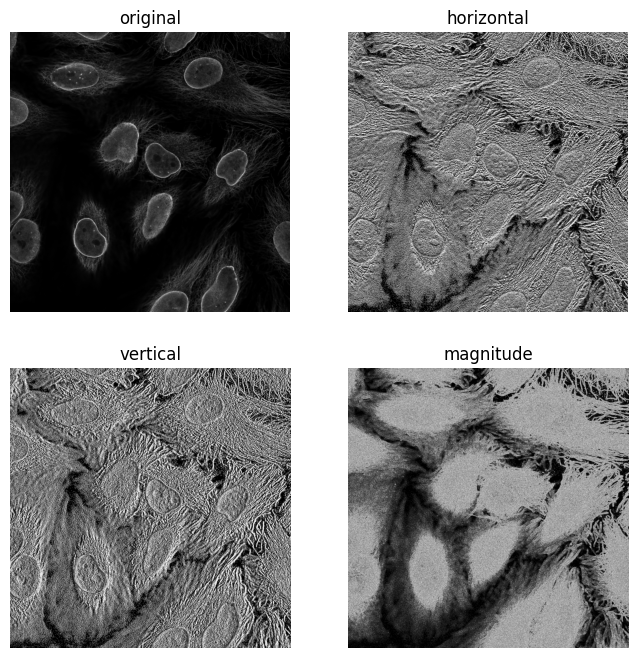

In [10]:
prewitt_h = ndimage.prewitt(img, axis=0)
prewitt_v = ndimage.prewitt(img, axis=1)
magnitude = np.sqrt(prewitt_h ** 2 + prewitt_v ** 2)
magnitude *= 255 / np.max(magnitude) # Normalization
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
plt.gray()
axes[0, 0].imshow(img)
axes[0, 1].imshow(prewitt_h)
axes[1, 0].imshow(prewitt_v)
axes[1, 1].imshow(magnitude)
titles = ["original", "horizontal", "vertical", "magnitude"]
for i, ax in enumerate(axes.ravel()):
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()

## Sobel Operator
The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. Typically it is used to find the approximate absolute gradient magnitude at each point in an input grayscale image.

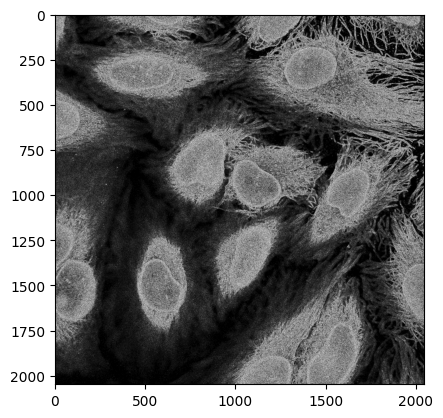

In [11]:
roberts_cross_v = np.array( [[1, 0 ],
							[0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
							[ -1, 0 ]] )

vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

plt.imshow(edged_img , cmap='gray')

## Canny Edge Detection
is a technique to extract useful structural information from different vision objects and dramatically reduce the amount of data to be processed. It has been widely applied in various computer vision systems.

It has some important advantage like `Noise Reduction` and `Finding Intensity Gradient of the Image` , `Non-maximum Suppression` and etc.



Text(0.5, 1.0, 'Canny Edge')

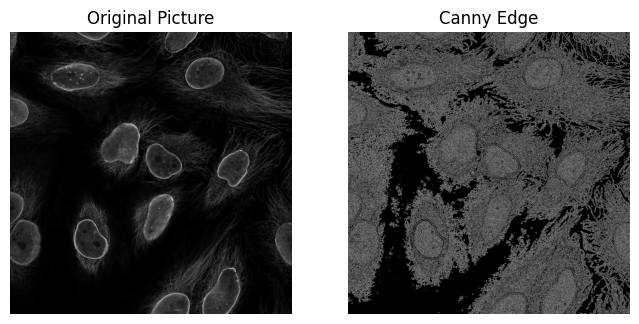

In [39]:
t_lower = 50
t_upper = 150
aperture_size = 5

edge = cv2.Canny(img , t_lower , t_upper , apertureSize=aperture_size) ;


fig = plt.figure(figsize=(8, 10))
rows = 2
columns = 2

fig.add_subplot(rows , columns , 1 )


plt.imshow(img)
plt.axis('off')
plt.title("Original Picture")

fig.add_subplot(rows , columns , 2)

plt.imshow(edge)
plt.axis('off')
plt.title("Canny Edge")



